# Що таке Tensorflow?

TensorFlow - це відкрите програмне забезпечення для машинного навчання, розроблене Google у 2015 році. Воно надає інструменти для побудови та навчання широкого спектру моделей машинного навчання, включаючи нейронні мережі.

Це ПЗ дозволяє проводити розрахунки методом **графа обчислень**. Таким чином воно дозволяє проводити ефективні розрахунки.

Ефективність з'являється за рахунок видалення дублюючих рохрахунків, якщо такі з'являються. І розпаралелювання процесу. А саме TensorFlow має гнучку архітектуру, що дозволяє працювати як на **одному процесорі**, так і на **розподіленій системі**, також підтримується використання на **графічних процесорах (GPU)**.

## Тензор


**Тензор** - це математичний об'єкт, який можна розглядати як узагальнення скаляру, вектора та матриці на більш високі розмірності. У термінології лінійної алгебри, тензор - це многовимірний масив чисел, який може бути обчислений за допомогою правил алгебричних операцій. Тензор це узагальнене всіх видів лінійних об'єктів таких як: скаляр, вектор, ковектор, лінійний оператор і білінійна форма.

- Тензор рангу (0,0) є скаляр;
- Тензор рангу (1,0) є вектор;
- Тензор рангу (0,1) є ковектор (коваріантний вектор), тобто елемент простору V*;
- Тензор рангу (0,2) є білінійна форма;
- Тензор рангу (1,1) є лінійний оператор.

![alt text](https://coderlessons.com/wp-content/uploads/2019/07/tensor_data_structure.jpg)


Приклад. Тензор механічних напружень, це тензор другого порядку. Компоненти тензора у тривимірній Декартовій системі координат утворюють матрицю виду

 \begin{aligned}\sigma &={\begin{bmatrix}\mathbf {T} ^{(\mathbf {e} _{1})}\mathbf {T} ^{(\mathbf {e} _{2})}\mathbf {T} ^{(\mathbf {e} _{3})}\\\end{bmatrix}}\\&={\begin{bmatrix}\sigma _{11}&\sigma _{12}&\sigma _{13}\\\sigma _{21}&\sigma _{22}&\sigma _{23}\\\sigma _{31}&\sigma _{32}&\sigma _{33}\end{bmatrix}}\\\end{aligned}

 ![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Components_stress_tensor.svg/1024px-Components_stress_tensor.svg.png)

## Граф обчислення

Хай маємо таке рівнняня $f(x, y) = (x + y)^2 + 2xy$. Тоді за допомогою графів його можно розрахувати як на картинці нижче. Цільова задача уявити цільову функцію $f(x,y)$ набором елементарних математичних операцій.

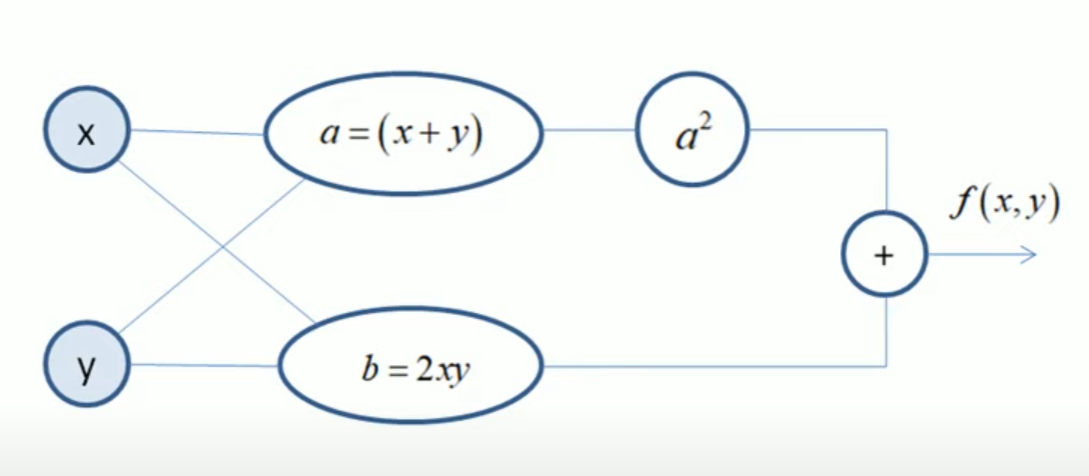

Як тоді вона дозволяє розраховувати дифіріцювання?

Tensorflow дозволяє розраховувати численні рішення похідних, методом зворотнього обчислення похідних.

https://uk.wikipedia.org/wiki/Автоматичне_диференціювання

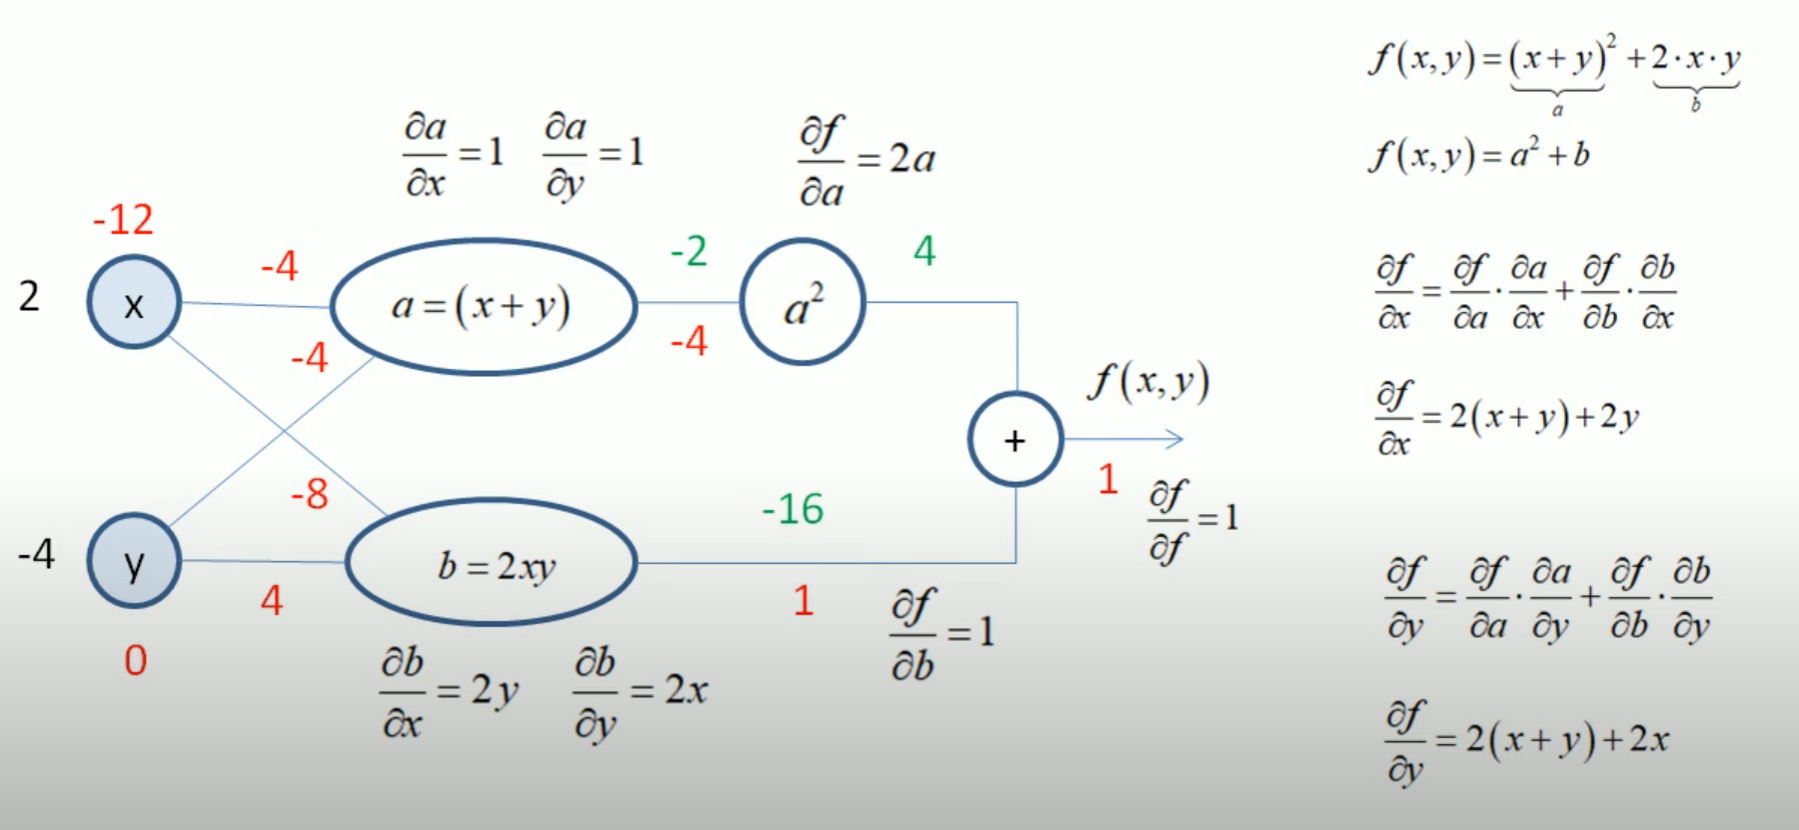

Тоді кожну нейронну мережу можно уявити таким чином

![alt text](https://www.researchgate.net/publication/351660123/figure/fig12/AS:1024786746589206@1621339608615/A-simple-neural-network-illustrating-Equation-1-Inputs-x-multiplied-by-weights-w.png)

### Як це реалізувати?

In [ ]:
# https://www.tensorflow.org/
import tensorflow as tf

tf.__version__

In [ ]:
# 1
x = tf.Variable([[2.0]])
y = tf.Variable([[-4.0]])

with tf.GradientTape() as tape: # Процесс зберігання всіх проміжкових похідних під час дифірінцювання
  f = (x + y)**2 + 2 * x * y

df = tape.gradient(f, [x, y])
print(df[0], df[1], sep = '\n')

![alt text](https://textbook.edu.goit.global/python/data-science-remaster/v1/img/module-09/computational_graph.png)

In [ ]:
# 2
# y = (a*b)/(a+b)
import tensorflow as tf
def func(a, b):
    prod = tf.multiply(a, b)
    sum = tf.add(a, b)
    res = tf.divide(prod, sum)
    return res

function_that_uses_a_graph = tf.function(func)

x1 = tf.constant(15.0)
x2 = tf.constant(5.0)

orig_value = func(x1, x2).numpy()
tf_function_value = function_that_uses_a_graph(x1, x2).numpy()

assert(orig_value == tf_function_value)

# Ініціалізація та індексація

TensorFlow підтримує різні типи даних для представлення та обробки даних. Основні типи даних у TensorFlow включають:

1. tf.Tensor
- це основний тип даних, який представляє тензори у TensorFlow
- Тензори є незмінними (immutable)
- Вони можуть бути результатом операцій або використовуватися як вхідні дані для операцій.
- Зазвичай використовується для подання результатів обчислень.

2. tf.Variable (tf.sparse.SparseTensor, tf.RaggedTensor)
- це спеціальний тип тензора, який може змінюватися під час виконання програми.
- Використовується для представлення змінних, таких як параметри моделей машинного навчання.
- Часто використовується під час тренування моделей, коли потрібно змінювати значення параметрів для оптимізації.

3. tf.constant
- це спеціальна функція для створення тензорів з константними значеннями.
- не може змінюватися під час виконання програми
- Використовується для представлення констант, які залишаються незмінними впродовж виконання програми.


In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/constant
import tensorflow as tf
a = tf.constant([[1.], [2.]], dtype=tf.float64)
print(a)
print('-----dtype:', a.dtype)
print('-----ndim:', a.ndim)
print('-----shape:', a.shape)
print('-----type:', type(a))

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/Variable
# https://www.tensorflow.org/api_docs/python/tf/sparse/SparseTensor
# https://www.tensorflow.org/api_docs/python/tf/RaggedTensor
import tensorflow as tf
a = tf.Variable(initial_value = [[1.], [2.]],
                #trainable = True, # Позначає, чи варто оновлювати цю змінну під час навчання моделі. За замовчуванням встановлено значення True, що означає, що змінна бере участь у градієнтних операціях під час оптимізації.
                #validate_shape = True, # Позначає, чи слід перевіряти форму тензора, який використовується для ініціалізації. Якщо цей параметр встановлено в False, то форма тензора може бути більшою, ніж форма змінної, і значення буде вирівняне згідно з формою змінної.
                #name = 'Variable', # Назва змінної.
                #dtype = None, #Тип даних, який має мати змінна.
                #constraint = , # Функція обмеження, яка може застосовуватися до значень змінної. Це може бути корисно для обмеження значень в межах певного діапазону.
                #synchronization = 'AUTO', #  Визначає, як змінна синхронізується між пристроями, коли використовується розподілений обчислювальний граф
                #aggregation =  # Визначає, як значення змінної агрегуються між пристроями при оновленні в розподіленому обчислювальному граф
                )
print(a)
print('-----dtype:', a.dtype)
print('-----shape:', a.shape)
print('-----name:', a.name)
print('-----type:', type(a))

In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/Tensor
import tensorflow as tf
a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
b = tf.constant([[1.0, 1.0], [0.0, 1.0]])

c = tf.matmul(a, b)
print(c)

In [ ]:
a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
b = tf.constant([[1.0, 1.0], [0.0, 1.0]])
c = tf.matmul(a, b)
print(c)
print('-----dtype:', c.dtype)
print('-----ndim:', c.ndim)
print('-----shape:', c.shape)
print('-----type:', type(c))
print('-'*50)
d = c.numpy()
print(d)
print(type(d))
print('-'*50)
e = tf.convert_to_tensor(d)
print(e)
print(type(e))
print('-'*50)

tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)
-----dtype: <dtype: 'float32'>
-----ndim: 2
-----shape: (2, 2)
-----type: <class 'tensorflow.python.framework.ops.EagerTensor'>
--------------------------------------------------
[[1. 3.]
 [3. 7.]]
<class 'numpy.ndarray'>
--------------------------------------------------
tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>
--------------------------------------------------


### Індексація

In [ ]:
my_variable = tf.Variable([1, 2, 3, 4, 5])
print(my_variable[0])
print(my_variable[0:2])

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([1 2], shape=(2,), dtype=int32)


In [ ]:
import tensorflow as tf
my_variable = tf.Variable([1, 2, 3, 4, 5])
print(my_variable)
updated_variable = my_variable[0].assign(9)
print(updated_variable)

<tf.Variable 'Variable:0' shape=(5,) dtype=int32, numpy=array([1, 2, 3, 4, 5], dtype=int32)>
<tf.Variable 'UnreadVariable' shape=(5,) dtype=int32, numpy=array([9, 2, 3, 4, 5], dtype=int32)>


In [ ]:
import tensorflow as tf
my_variable = tf.constant([1, 2, 3, 4, 5])
print(my_variable)
updated_variable = my_variable[0].assign(9) #!!!!!
print(updated_variable)

tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/Tensor
import tensorflow as tf
a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
b = tf.constant([[1.0, 1.0], [0.0, 1.0]])

c = tf.matmul(a, b)
print(c)
print('-'*50)
print(c[0, 0])
print('-'*50)
c_new = c[0, 0].assign(9) # !!!!!
print(c_new)

tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)
--------------------------------------------------
tf.Tensor(1.0, shape=(), dtype=float32)
--------------------------------------------------


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

# Дії над тензорами

### Прості дії

У TensorFlow ви можете виконувати різноманітні дії над тензорами, такі як математичні операції, логічні операції, зміна форми, злиття тензорів і багато іншого. Ось деякі з найпоширеніших операцій, які ви можете виконувати над тензорами в TensorFlow:

**Математичні операції**:

- Додавання: tf.add(a, b)
- Віднімання: tf.subtract(a, b)
- Множення: tf.multiply(a, b)
- Ділення: tf.divide(a, b)
- Піднесення до степеня: tf.pow(x, n)
- Логарифм: tf.math.log(x)
- Експонента: tf.exp(x)
- Тригонометричні функції: tf.sin(x), tf.cos(x), і т.д.

**Операції з логічними значеннями:**

- Логічне І: tf.logical_and(a, b)
- Логічне АБО: tf.logical_or(a, b)
- Логічне НЕ: tf.logical_not(a)
**Зміна форми тензорів:**

- Зміна форми: tf.reshape(tensor, shape)
- Перетворення вектора у матрицю: tf.reshape(vector, (rows, cols))
- Розгортання (flatten): tf.reshape(tensor, [-1])

**Злиття тензорів:**

- Злиття тензорів за першим розміром: tf.concat([tensor1, tensor2], axis=0)
- Злиття тензорів за іншим розміром: tf.concat([tensor1, tensor2], axis=1)

**Зведення статистики:**

- Сума елементів: tf.reduce_sum(tensor)
- Середнє значення: tf.reduce_mean(tensor)
- Максимум: tf.reduce_max(tensor)
- Мінімум: tf.reduce_min(tensor)
**Операції зі знаками:**

- Знак числа: tf.sign(tensor)
- Абсолютне значення: tf.abs(tensor)

In [ ]:
import tensorflow as tf

# Створення тензорів
tensor_a = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
tensor_b = tf.constant([6, 7, 8, 9, 10], dtype=tf.float32)

# Математичні операції
addition = tf.add(tensor_a, tensor_b)
subtraction = tf.subtract(tensor_a, tensor_b)
multiplication = tf.multiply(tensor_a, tensor_b)
division = tf.divide(tensor_a, tensor_b)
power = tf.pow(tensor_a, 2)
logarithm = tf.math.log(tensor_a)

print("Додавання:", addition)
print('-'*50)
print("Віднімання:", subtraction)
print('-'*50)
print("Множення:", multiplication)
print('-'*50)
print("Ділення:", division)
print('-'*50)
print("Піднесення до степеня:", power)
print('-'*50)
print("Логарифм:", logarithm)

Додавання: tf.Tensor([ 7.  9. 11. 13. 15.], shape=(5,), dtype=float32)
--------------------------------------------------
Віднімання: tf.Tensor([-5. -5. -5. -5. -5.], shape=(5,), dtype=float32)
--------------------------------------------------
Множення: tf.Tensor([ 6. 14. 24. 36. 50.], shape=(5,), dtype=float32)
--------------------------------------------------
Ділення: tf.Tensor([0.16666667 0.2857143  0.375      0.44444445 0.5       ], shape=(5,), dtype=float32)
--------------------------------------------------
Піднесення до степеня: tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
--------------------------------------------------
Логарифм: tf.Tensor([0.        0.6931472 1.0986123 1.3862944 1.609438 ], shape=(5,), dtype=float32)


In [ ]:
tensor_a % tensor_b

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 2., 3., 4., 5.], dtype=float32)>

In [ ]:
# Операції з логічними значеннями
logical_and = tf.logical_and(tensor_a > 2, tensor_b < 9)
logical_or = tf.logical_or(tensor_a < 3, tensor_b > 8)
logical_not = tf.logical_not(tensor_a < 3)

print("Логічне І:", logical_and)
print('-'*50)
print("Логічне АБО:", logical_or)
print('-'*50)
print("Логічне НЕ:", logical_not)

Логічне І: tf.Tensor([False False  True False False], shape=(5,), dtype=bool)
--------------------------------------------------
Логічне АБО: tf.Tensor([ True  True False  True  True], shape=(5,), dtype=bool)
--------------------------------------------------
Логічне НЕ: tf.Tensor([False False  True  True  True], shape=(5,), dtype=bool)


In [ ]:
# Зміна форми тензорів
reshaped_tensor = tf.reshape(tensor_a, (5, 1))
flattened_tensor = tf.reshape(tensor_a, [-1])
print("Зміна форми тензора:", reshaped_tensor)
print('-'*50)
print("Розгортання тензора:", flattened_tensor)

Зміна форми тензора: tf.Tensor(
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]], shape=(5, 1), dtype=float32)
--------------------------------------------------
Розгортання тензора: tf.Tensor([1. 2. 3. 4. 5.], shape=(5,), dtype=float32)


In [ ]:
# Операції статистики
sum_tensor = tf.reduce_sum(tensor_a)
mean_tensor = tf.reduce_mean(tensor_a)
max_tensor = tf.reduce_max(tensor_a)
min_tensor = tf.reduce_min(tensor_a)
print("Сума елементів:", sum_tensor)
print('-'*50)
print("Середнє значення:", mean_tensor)
print('-'*50)
print("Максимум:", max_tensor)
print('-'*50)
print("Мінімум:", min_tensor)

Сума елементів: tf.Tensor(15.0, shape=(), dtype=float32)
--------------------------------------------------
Середнє значення: tf.Tensor(3.0, shape=(), dtype=float32)
--------------------------------------------------
Максимум: tf.Tensor(5.0, shape=(), dtype=float32)
--------------------------------------------------
Мінімум: tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
# Операції зі знаками
sign_tensor = tf.sign(tensor_a)
abs_tensor = tf.abs(tensor_a)
print("Знак числа:", sign_tensor)
print('-'*50)
print("Абсолютне значення:", abs_tensor)

Знак числа: tf.Tensor([1. 1. 1. 1. 1.], shape=(5,), dtype=float32)
--------------------------------------------------
Абсолютне значення: tf.Tensor([1. 2. 3. 4. 5.], shape=(5,), dtype=float32)


У TensorFlow доступні як тригонометричні, так і гіперболічні функції для роботи з тензорами. Ось деякі з них:

**Тригонометричні функції:**
- Синус: tf.sin(x)
- Косинус: tf.cos(x)
- Тангенс: tf.tan(x)
- Арксинус: tf.asin(x)
- Арккосинус: tf.acos(x)
- Арктангенс: tf.atan(x)
- Гіпотенуза: tf.hypot(x, y)

**Гіперболічні функції:**
- Гіперболічний синус: tf.sinh(x)
- Гіперболічний косинус: tf.cosh(x)
- Гіперболічний тангенс: tf.tanh(x)
- Обернений гіперболічний синус: tf.asinh(x)
- Обернений гіперболічний косинус: tf.acosh(x

In [ ]:
import tensorflow as tf

x = tf.constant([0.0, 1.0, 2.0, 3.0, 4.0], dtype=tf.float32)

# Обчислення синусу кожного елемента
sin_values = tf.sin(x)
# Обчислення гіперболічного синусу кожного елемента
sinh_values = tf.sinh(x)

print("Значення синусу кожного елемента:", sin_values)
print("\nЗначення гіперболічного синусу кожного елемента:", sinh_values)

Значення синусу кожного елемента: tf.Tensor([ 0.          0.84147096  0.9092974   0.14112    -0.7568025 ], shape=(5,), dtype=float32)

Значення гіперболічного синусу кожного елемента: tf.Tensor([ 0.         1.1752012  3.6268604 10.017875  27.289919 ], shape=(5,), dtype=float32)


### Матричні дії

Матричні операції дуже важливі в глибокому навчанні і обробці даних. У TensorFlow для цього є спеціальні функції. Ось декілька матричних операцій, які можна виконувати з допомогою TensorFlow:

1. **Матричне множення (Matrix Multiplication)**:

- tf.matmul(a, b)

Ця операція виконує матричне множення між двома тензорами a та b. Перший тензор a повинен мати форму [M, N], а другий тензор b повинен мати форму [N, P]. Результатом буде новий тензор з формою [M, P], де кожен елемент є сумою добутків відповідних елементів рядків та стовпців.
2. **Транспонування (Transpose):**

- tf.transpose(a)
Ця операція транспонує (переставляє) розміри тензора a. Наприклад, якщо a має форму [M, N], результатом буде тензор з формою [N, M], де елементи рядків і стовпців a переставлені.
3. **Детермінант (Determinant):**

- tf.linalg.det(a)

Ця операція обчислює детермінант квадратної матриці a.
Обернена матриця (Matrix Inversion): tf.linalg.inv(a). Ця операція обчислює обернену матрицю для квадратної матриці a.
4. **Складання матриць (Matrix Concatenation):**

- tf.concat([a, b], axis)

Ця операція об'єднує (складає) тензори a та b вздовж вказаної осі axis. Можливі значення для axis - 0 для об'єднання вздовж рядків (перший розмір) або 1 для об'єднання вздовж стовпців (другий розмір).

5. **Розділення матриці (Matrix Splitting):**

- tf.split(a, num_or_size_splits, axis)

Ця операція розділяє тензор a на підтензори вздовж вказаної осі axis. num_or_size_splits може бути числом, що вказує кількість розділень, або списком розмірів підтензорів.
6. **Розклад Свд (Singular Value Decomposition, SVD):**

- tf.linalg.svd(a)

Ця операція розкладає матрицю a на умовні матриці U, S та V.

In [ ]:
import tensorflow as tf

a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[5, 6], [7, 8]])

result = tf.matmul(a, b)

print("Результат матричного множення:")
print(result)

Результат матричного множення:
tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


In [ ]:
import tensorflow as tf

a = tf.constant([[1, 2], [3, 4]])
result = tf.transpose(a)

print("Результат транспонування:")
print(result)

Результат транспонування:
tf.Tensor(
[[1 3]
 [2 4]], shape=(2, 2), dtype=int32)


In [ ]:
import tensorflow as tf

a = tf.constant([[1, 2], [3, 4]], dtype = tf.float32)

result = tf.linalg.det(a)

print("Детермінант матриці:")
print(result)

Детермінант матриці:
tf.Tensor(-2.0, shape=(), dtype=float32)


In [ ]:
import tensorflow as tf

a = tf.constant([[1, 2], [3, 4]], dtype = tf.float32)

result = tf.linalg.inv(a)

print("Обернена матриця:")
print(result)

Обернена матриця:
tf.Tensor(
[[-2.0000002   1.0000001 ]
 [ 1.5000001  -0.50000006]], shape=(2, 2), dtype=float32)


In [ ]:
import tensorflow as tf

a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[5, 6], [7, 8]])

result_row = tf.concat([a, b], axis=0)
result_col = tf.concat([a, b], axis=1)

print("Результат злиття матриць вздовж рядків:")
print(result_row)

print("\nРезультат злиття матриць вздовж стовпців:")
print(result_col)

Результат злиття матриць вздовж рядків:
tf.Tensor(
[[1 2]
 [3 4]
 [5 6]
 [7 8]], shape=(4, 2), dtype=int32)

Результат злиття матриць вздовж стовпців:
tf.Tensor(
[[1 2 5 6]
 [3 4 7 8]], shape=(2, 4), dtype=int32)


In [ ]:
import tensorflow as tf

a = tf.constant([[1, 2], [3, 4], [5, 6], [7,8]], dtype = tf.float32)

splits = tf.split(a, num_or_size_splits=2, axis=0)

print("Результат розділення матриці:")
for split in splits:
    print(split)

Результат розділення матриці:
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5. 6.]
 [7. 8.]], shape=(2, 2), dtype=float32)


In [ ]:
import tensorflow as tf

a = tf.constant([[1, 2], [3, 4]], dtype = tf.float32)
s, u, v = tf.linalg.svd(a)

print("Singular values:")
print(s)

print("\nLeft singular vectors (U):")
print(u)

print("\nRight singular vectors (V):")
print(v)

Singular values:
tf.Tensor([5.4649854  0.36596614], shape=(2,), dtype=float32)

Left singular vectors (U):
tf.Tensor(
[[ 0.4045535 -0.9145143]
 [ 0.9145143  0.4045535]], shape=(2, 2), dtype=float32)

Right singular vectors (V):
tf.Tensor(
[[ 0.5760484  0.8174156]
 [ 0.8174156 -0.5760484]], shape=(2, 2), dtype=float32)


# Популярні (важливі) модулі

1. **tf.keras**: Цей модуль надає високорівневий інтерфейс для побудови нейронних мереж. Він містить класи для створення та навчання моделей, включаючи повністю з'єднані мережі, згорткові мережі, рекурентні мережі та інші. Крім того, він надає доступ до попередньо навчених моделей та зручний інтерфейс для виконання різних завдань машинного навчання.

2. **tf.data**: Цей модуль надає інструменти для роботи з вхідними даними. Він містить класи для створення та обробки потокових наборів даних, включаючи завантаження даних з файлів, перетворення даних, перемішування, пакетування та інше. Цей модуль особливо корисний для навчання моделей на великих наборах даних.

3. **tf.losses**: Цей модуль містить реалізації різних функцій втрат, які можна використовувати для навчання моделей. Він включає функції для класифікації, регресії, семантичної сегментації та інших завдань.

4. **tf.optimizers**: Цей модуль містить реалізації різних оптимізаторів, які можна використовувати для навчання моделей. Він включає стандартні оптимізатори, такі як SGD, Adam, RMSProp та інші.

5. **tf.nn** - всі необхідні функції для побудови нейронної мережі.

6. **tf.image**: Цей модуль містить функції для обробки зображень. Він включає операції зміни розмірності, вирізання, зміни яскравості та контрасту, аугментації даних та інші операції, які корисні для обробки зображень перед використанням їх для навчання моделей.

7. **tf.text**: модуль надає різноманітні інструменти для обробки тексту, включаючи токенізацію, векторизацію, конвертацію тексту в числові представлення, а також роботу зі вбудованими моделями обробки мови.


# Проста нейронна мережа

## Мануальна реалізація

In [ ]:
# y = w_1 * x_1 + b
# In: x_1
# Hidden: 1 Dense

import tensorflow as tf


class SimpleModule(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(5.0)

    def __call__(self, x):
        return self.w * x + self.b


simple_module = SimpleModule(name="simple")
simple_module(tf.constant(5.0))

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

In [ ]:
# In: 3 (x_1, x_2, x_3)
# Hidden_1: 1 Dense
# Hidden_2: 2 Dense


class DenseLayer(tf.Module):
    def __init__(self, in_features, out_features, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(
            tf.random.normal([in_features, out_features]), name="w"
        )
        self.b = tf.Variable(tf.zeros([out_features]), name="b")

    def __call__(self, x):
        y = tf.matmul(x, self.w) + self.b
        return tf.nn.relu(y)  # Функція активації


class NN(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)
    self.layer_1 = DenseLayer(in_features=3, out_features=3) # Hidden_1
    self.layer_2 = DenseLayer(in_features=3, out_features=1) # Hidden_2

  def __call__(self, x):
    x = self.layer_1(x)
    return self.layer_2(x)

nn = NN(name="neural_network")
print("Results:", nn(tf.constant([[2.0, 2.0, 2.0]])))

Results: tf.Tensor([[0.4121355]], shape=(1, 1), dtype=float32)


In [ ]:
# a(x) = w_1*x_1 + w_2*x_2 +...+ w_n*x_n + b
# In: n (x_1, x_2, ..., x_n)
# Hidden: 1 Dense

import tensorflow as tf

class LinearModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.w * x + self.b

def loss(target_y, predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y))


def train(model, x, y, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(y, model(x))
        dw, db = t.gradient(current_loss, [model.w, model.b])
        model.w.assign_sub(learning_rate * dw)
        model.b.assign_sub(learning_rate * db)

def training_loop(model, x, y):
    for epoch in range(10):
        train(model, x, y, learning_rate=0.1)
        current_loss = loss(y, model(x))
        print(f"Epoch {epoch}. Loss: {current_loss}")

In [ ]:
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000

x = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])
y = x * TRUE_W + TRUE_B + noise


linear_model = LinearModel()
training_loop(linear_model, x, y)

Epoch 0. Loss: 6.3375067710876465
Epoch 1. Loss: 4.404295444488525
Epoch 2. Loss: 3.1692054271698
Epoch 3. Loss: 2.380131244659424
Epoch 4. Loss: 1.8760077953338623
Epoch 5. Loss: 1.5539333820343018
Epoch 6. Loss: 1.3481664657592773
Epoch 7. Loss: 1.2167060375213623
Epoch 8. Loss: 1.1327186822891235
Epoch 9. Loss: 1.0790607929229736


## Keras реалізація


##Бінарна класифікація

In [ ]:
import numpy as np
import tensorflow as tf
np.random.seed(0)

ROWS = 1000
COLUMNS = 10
CLASSES = 2

X = np.random.rand(ROWS, COLUMNS)
y = np.random.randint(CLASSES, size=ROWS)
# Створення моделі

# inputs = tf.keras.Input(shape=(COLUMNS,)) # Оголошення вхідних даних
# hidden_layer = tf.keras.layers.Dense(128, activation='relu')(inputs) # Оголошення прихованого шару та активації
# predictions = tf.keras.layers.Dense(1, activation='softmax')(hidden_layer) # Оголошення вихідного шару та активації
# model = tf.keras.Model(inputs=inputs, outputs=predictions)

# Створення моделі з використанням Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(COLUMNS,), name='dense_layer_1'),# tf.nn.relu
    tf.keras.layers.Dense(1, activation='sigmoid', name='dense_layer_2') # tf.nn.sigmoid
])

# Компіляція моделі
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # tf.keras.optimizers.Adam(learning_rate=0.001)  # Функція оптимізації
              loss='binary_crossentropy', # Функція втрат
              metrics=['accuracy'], # Які метрики рахувати під час навчання
              #loss_weights = None,   # Це параметр, який дозволяє вказати вагу кожної компоненти функції втрат у загальній функції втрат. Використовується, наприклад, у випадку моделей, де є декілька вихідних шарів, і хочете надати різні ваги для кожного з них.
              #weighted_metrics=, # Аналогічно атрибуту metrics, але дозволяє вказати ваги для кожної метрики. Це корисно, коли ви хочете врахувати важливість різних метрик при оцінці моделі.
              # run_eagerly = False,  #Булеве значення, яке вказує, чи виконувати навчання в режимі "eager execution". В режимі "eager execution" обчислення відбуваються одразу, без створення графа обчислень.
              # steps_per_execution = 'auto', Цей параметр дозволяє вказати кількість кроків (батчів), які виконуються за кожне викликане навчання методу fit. Це може підвищити ефективність навчання на GPU.


              )
model.summary()
# Навчання моделі
history = model.fit(X, y,
          epochs=10,
          batch_size=100,   # Це розмір партії (batch size), тобто кількість прикладів, які обробляються одночасно перед оновленням ваг моделі.
          validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1 (Dense)       (None, 128)               1408      
                                                                 
 dense_layer_2 (Dense)       (None, 1)                 129       
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
8/8 [==============================] - 1s 34ms/step - loss: 0.6973 - accuracy: 0.4700 - val_loss: 0.6944 - val_accuracy: 0.5150
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6936 - accuracy: 0.5163 - val_loss: 0.6930 - val_accuracy: 0.5150
Epoch 3/10
8/8 [==============================] - 0s 10ms/step - loss: 0.6923 - accuracy: 0.5300 - val_loss: 0.6935 - val_accuracy: 0.5150
Epoc

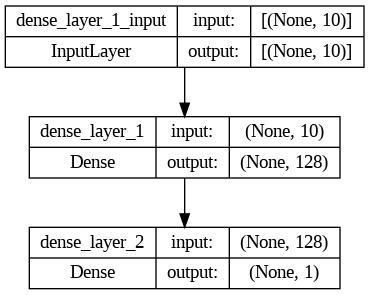

In [ ]:
tf.keras.utils.plot_model(model,
                          to_file='model_plot.png',
                          show_shapes=True,
                          show_layer_names=True)

In [ ]:
# Очищення історії навчання
history.history.clear()

##Мультікласова класифікація

In [ ]:
import numpy as np
import tensorflow as tf
np.random.seed(0)

ROWS = 1000
COLUMNS = 10
CLASSES = 3

X = np.random.rand(ROWS, COLUMNS)
y = np.random.choice([i for i in range(CLASSES)],
                     size=ROWS)

# Створення моделі з використанням Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(COLUMNS,)),
    tf.keras.layers.Dense(CLASSES, activation='softmax')
], name='my_model' )

# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
# Навчання моделі
model.fit(X, y,
          epochs=10,
          batch_size=32,
          validation_split=0.2)

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1795 (7.01 KB)
Trainable params: 1795 (7.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 1s 11ms/step - loss: 1.1045 - accuracy: 0.3500 - val_loss: 1.1070 - val_accuracy: 0.3100
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 1.0987 - accuracy: 0.3625 - val_loss: 1.1046 - val_accuracy: 0.3150
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 1.0958 - accuracy: 0.3713 - val_loss: 1.1051 - val_accuracy: 0.3100
E

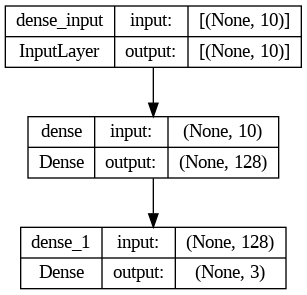

In [ ]:
tf.keras.utils.plot_model(model,
                          to_file='model_plot.png',
                          show_shapes=True,
                          show_layer_names=True)

##Регресія

In [ ]:
import numpy as np
import tensorflow as tf


ROWS = 1000
COLUMNS = 10

X = np.random.rand(ROWS, COLUMNS)
y = 2 * X + 1 + np.random.randn(ROWS, 1) * 2


# Створення моделі з використанням Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(COLUMNS,))
])
model.summary()

# Компіляція моделі
model.compile(optimizer='adam',
              loss='mean_squared_error')

# Навчання моделі
history = model.fit(X, y,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2
                    )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 110 (440.00 Byte)
Trainable params: 110 (440.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 1s 8ms/step - loss: 8.3207 - val_loss: 8.1326
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 7.7512 - val_loss: 7.6095
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 7.2445 - val_loss: 7.1554
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 6.7937 - val_loss: 6.7578
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 6.4078 - val_loss: 6.3944
Epoch 6/10
25/25 [==============================] - 0s

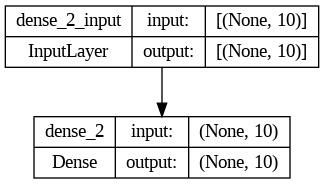

In [ ]:
tf.keras.utils.plot_model(model,
                          to_file='model_plot.png',
                          show_shapes=True,
                          show_layer_names=True)

## Датасет MNIST

MNIST є одним з найпопулярніших датасетів у галузі комп'ютерного зору. У ньому зібрані чорно-білі зображення рукописних цифр від 0 до 9, кожне розміром 28x28 пікселів.
У цьому коді ми

- завантажуємо дані,
- нормалізуємо їх до діапазону [0, 1],
- створюємо модель з одним прихованим шаром з 128 нейронами та вихідним шаром з 10 нейронами для класифікації 10 класів (цифри від 0 до 9).
- Після тренування ми оцінюємо точність моделі на тестових даних.

In [ ]:
import tensorflow as tf

# Завантаження даних
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Нормалізуємо їх
X_train, X_test = X_train / 255.0, X_test / 255.0
# Створення моделі
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Випрямлення зображень у вектор
    tf.keras.layers.Dense(128, activation='relu'),  # Прихований шар з 128 нейронами
    tf.keras.layers.Dense(10, activation='softmax')  # Вихідний шар з 10 нейронами (10 класів)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Навчаємо
model.fit(X_train, y_train,
          epochs=5,
          validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2640 - accuracy: 0.9235 - val_loss: 0.1384 - val_accuracy: 0.9588
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1197 - accuracy: 0.9647 - val_loss: 0.0949 - val_accuracy: 0.9716
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0804 - accuracy: 0.9754 - val_loss: 0.0867 - val_accuracy: 0.9716
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0607 - accuracy: 0.9813 - val_loss: 0.0857 - val_accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0471 - accuracy: 0.9854 - val_loss: 0.0725 - val_accuracy: 0.9767


In [ ]:
# Оцінюємо точність
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nТочність на тестових даних:', test_acc)